<a href="https://colab.research.google.com/github/sasansharifipour/Spark_Class/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0K5PJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0K5PJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0K5PJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

Updating of the Bliss theme is merely the latest in a lengthening queue of bad-to-average local comedies which appeal to the conservative cinema-going set. (For the record, this list, all of the films on which appear to be attempting a Castle-esque miracle, includes, Strange Bedfellows, Thunderstruck, Bad Eggs, The Honourable Wally Norman, Horseplay, The Wannabes and The Nugget. The only one to have worked has been Crackerjack.)<br /><br />Here, the performances never mesh, as John Howard doesn't even look like he's in the right film  though perhaps that was the intention, as Franklin plays sleepy, conservative suburbia against its more interesting inhabitants. 20-year-old virgins who live with their parents are becoming rarer on-screen, but this is hardly a reason to watch the film. In fact, the only reasons may well be (1) Howard's bizarre  but quite fun  performance, and (2) the 'suburban nightmare' theme, which has run through Somersault, Strange Bedfellows, Tom White, Alexandra

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 137s 258ms/step - loss: 0.5939 - accuracy: 0.6554 - val_loss: 0.7344 - val_accuracy: 0.7096
Epoch 2/10
391/391 [==============================] - 101s 257ms/step - loss: 0.4000 - accuracy: 0.8302 - val_loss: 0.4056 - val_accuracy: 0.8292
Epoch 3/10
391/391 [==============================] - 102s 261ms/step - loss: 0.3546 - accuracy: 0.8461 - val_loss: 0.5064 - val_accuracy: 0.7691
Epoch 4/10
391/391 [==============================] - 102s 260ms/step - loss: 0.5158 - accuracy: 0.7568 - val_loss: 0.4684 - val_accuracy: 0.8166
Epoch 5/10
391/391 [==============================] - 104s 264ms/step - loss: 0.2897 - accuracy: 0.8852 - val_loss: 0.4671 - val_accuracy: 0.7865
Epoch 6/10
391/391 [==============================] - 102s 260ms/step - loss: 0.2051 - accuracy: 0.9240 - val_loss: 0.4766 - val_accuracy: 0.8191
Epoch 7/10
391/391 [==============================] - 101s 258ms/step - loss: 0.1542 - accuracy: 0.9456 - val_loss: 0.5038 -

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

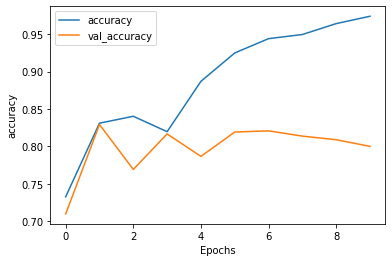

In [ ]:
plot_graphs(history, 'accuracy')

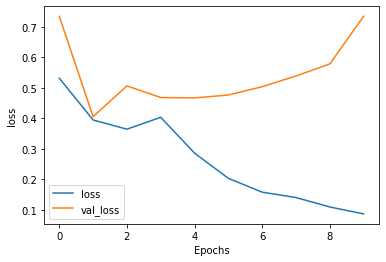

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
import numpy as np
features, label = iter(test_dataset).next()

y = model.predict(features)

for i in range(len(y)):
  print("Class suggested to actual : ", np.round(y[i]), " ====> : ", label[i])

Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(0, shape=(), dtype=int64)
Class suggested to actual :  [0.]  ====> :  tf.Tensor(0, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(0, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(1, shape=(), dtype=int64)
Class suggested to actual :  [0.]  ====> :  tf.Tensor(0, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====> :  tf.Tensor(0, shape=(), dtype=int64)
Class suggested to actual :  [1.]  ====>

In [ ]:
print(features[18])

tf.Tensor(
[1977  703  131 3781 5676  450  179 7968    8  107 1489   27   57  485
  525 6356   40    1 6282    6  166    3   19   98    6    4 2787  179
   47 2100 1826    4  907 2158   11 3729 7977  616  159   31    1  861
    6  699 5325   21 7193    2   26  159    4   74  497 1352    1 5400
    8   13  859    7    1 3482  773 8045    3   19  211   25    1 8008
 1765  460 7961 6645 7961  180 7191 2610  721   94 3110 7968    8  965
   24   10   16   10   17 4344    2  325   38   19 1969 1446 2158 1357
  450 8038 3062   54  346 7968   21  217    1  118   27    7  415 1068
 3607 8030    2   26   53  162    4  122  497   22   15  286    3 2636
 3659  179   64  119   32 1331 1538  180  191   14   65    3  135 7968
    8    4  122 2906 1323   28  528   12   96 2056   13   12  109 7968
   21  164  113 7911   15  203  158  133  283 7976  283   24   10   16
   10   17 2008    2    5  103  180   31 5719   43  338  142   38 1357
  450 8038 3062   54  180   35 2940 3422  462  453   38 1357  593 

In [17]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

features, label = iter(train_dataset).next()

print(info.features['text'].encoder.decode(features[1]))
print(label[1])
#print(features[1].numpy())

The first installment of this notorious horror series is presented as if it were a snuff film discovered by the producers and set up like an amateur camcorder tape, complete with a digital timer at the bottom of the frame. It presents a woman being kidnapped by a gang of black-clad men who torture her for several days before finally killing her. The hapless victim is beaten savagely and pelted with raw meat before having her fingernails pulled out with pliers, her hand smashed with a hammer, her eye punctured with a needle, and so forth.<br /><br />In the most nauseating scene, the woman's captors burn her with hot water and drop live maggots into the burns. The series received a great deal of publicity when American actor Charlie Sheen, believing the series to contain actual murder, attempted to ban its distribution in the United States. An FBI investigation revealed that the films were only what they appeared to be to most viewers -- sick re-creations using nasty, but obvious special